Project Description:

This project aims to predict whether someone will play badminton based on various weather conditions using machine learning models. The dataset includes features such as Outlook, Temperature, Humidity, and Wind, which are used to determine the likelihood of playing badminton (Play_Badminton).

The project involves the following steps:

1. Data Preprocessing: Categorical features are encoded into numeric labels using LabelEncoder to make them suitable for machine learning models.

2. Model Training: The dataset is split into training and testing sets. Three machine learning models are trained on the training data:

    a. Linear Regression: Used to predict continuous target variables.

   
    b. Decision Tree Classifier: A tree-based model used for classification tasks.

   
    c. K-Nearest Neighbors (KNN) Classifier: A model that classifies data points based on the majority class of their nearest neighbors.

   
4. Prediction and Evaluation: The models are evaluated on the test data. For classification models (Decision Tree and KNN), accuracy is calculated. For the regression model (Linear Regression), Mean Squared Error (MSE) is computed.

5. Custom Prediction Function: A custom function allows for predicting whether someone will play badminton based on user-provided weather conditions. The function encodes the input data, applies the trained models, and returns the predictions.

6. Visualization: The predictions from the Linear Regression model are visualized against the actual values to provide a clear understanding of the model's performance.

This project provides a comprehensive approach to understanding and applying machine learning techniques for both regression and classification tasks, demonstrating how different models can be used to predict outcomes based on various features.

The dataset consists of 36 entries and 5 columns: "Outlook," "Temperature," "Humidity," "Wind," and "Play_Badminton." All columns are of object type, meaning the data is categorical.

To read the data in the CSV file

In [6]:
import pandas as pd

In [7]:
data=pd.read_csv('badminton_dataset.csv')

In [8]:
data

,Outlook,Temperature,Humidity,Wind,Play_Badminton
0,Overcast,Cool,High,Weak,Yes
1,Sunny,Mild,Normal,Strong,No
2,Rain,Mild,Normal,Strong,No
3,Sunny,Cool,High,Weak,Yes
4,Sunny,Cool,High,Strong,No
5,Sunny,Mild,High,Strong,No
6,Rain,Cool,Normal,Strong,No
7,Rain,Cool,High,Strong,No
8,Sunny,Hot,High,Strong,No
9,Sunny,Hot,Normal,Strong,No


For the data information [The info() method prints information about the DataFrame.]

In [9]:
data.info

<bound method DataFrame.info of      Outlook Temperature Humidity    Wind Play_Badminton
0   Overcast        Cool     High    Weak            Yes
1      Sunny        Mild   Normal  Strong             No
2       Rain        Mild   Normal  Strong             No
3      Sunny        Cool     High    Weak            Yes
4      Sunny        Cool     High  Strong             No
5      Sunny        Mild     High  Strong             No
6       Rain        Cool   Normal  Strong             No
7       Rain        Cool     High  Strong             No
8      Sunny         Hot     High  Strong             No
9      Sunny         Hot   Normal  Strong             No
10  Overcast        Mild     High  Strong             No
11  Overcast         Hot     High  Strong             No
12     Sunny        Mild     High    Weak            Yes
13  Overcast         Hot   Normal  Strong             No
14     Sunny         Hot   Normal    Weak            Yes
15  Overcast        Cool   Normal  Strong             No

Libraries in Python for the project to be used

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

Code for the label

In [11]:
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

For Checking the LabelEncoder

In [12]:
le

LabelEncoder()

For the split the dataset into features (X) and target (y)

In [13]:
X = data.drop(columns='Play_Badminton')
y = data['Play_Badminton']

Features are all columns except 'Play_Badminton' (X)

In [14]:
X

,Outlook,Temperature,Humidity,Wind
0,0,0,0,1
1,2,2,1,0
2,1,2,1,0
3,2,0,0,1
4,2,0,0,0
5,2,2,0,0
6,1,0,1,0
7,1,0,0,0
8,2,1,0,0
9,2,1,1,0


Target is the 'Play_Badminton' column

In [15]:
y

0     1
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    0
17    1
18    0
19    0
20    0
21    0
22    1
23    0
24    1
25    0
26    0
27    1
28    1
29    0
30    1
31    1
32    0
33    0
34    1
35    0
Name: Play_Badminton, dtype: int32

Split the dataset into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

80% of the data will be used for training, 20% for testing

With random_state=42 , we get the same train and test sets across different executioms.

For Linear Regression Model

Initialize the LR, Train the model on the training dsta and predict the target variable on the
test data

In [17]:
model = LR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
model

LinearRegression()

y_pred

For the Decision Tree Model

In [19]:
decision = DecisionTreeClassifier(random_state=42) 
decision.fit(X_train, y_train) 
ypredTree = decision.predict(X_test) 

In [20]:
decision

DecisionTreeClassifier(random_state=42)

For K-Nearest Neighbors Model

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) 
ypredKnn = knn.predict(X_test)

In [31]:
knn

KNeighborsClassifier(n_neighbors=3)

In [22]:
accuracy_tree = accuracy_score(y_test, ypredTree)
accuracy_knn = accuracy_score(y_test, ypredKnn)
mse_linear = mean_squared_error(y_test, y_pred)

In [23]:
accuracy_tree, accuracy_knn, mse_linear

(1.0, 0.875, 0.1625919391467374)

Here are the results of the models:
1. Decision Tree Accuracy: 100%
2. K-Nearest Neighbors Accuracy: 87.5%
3. Linear Regression Mean Squared Error (MSE): 0.1626

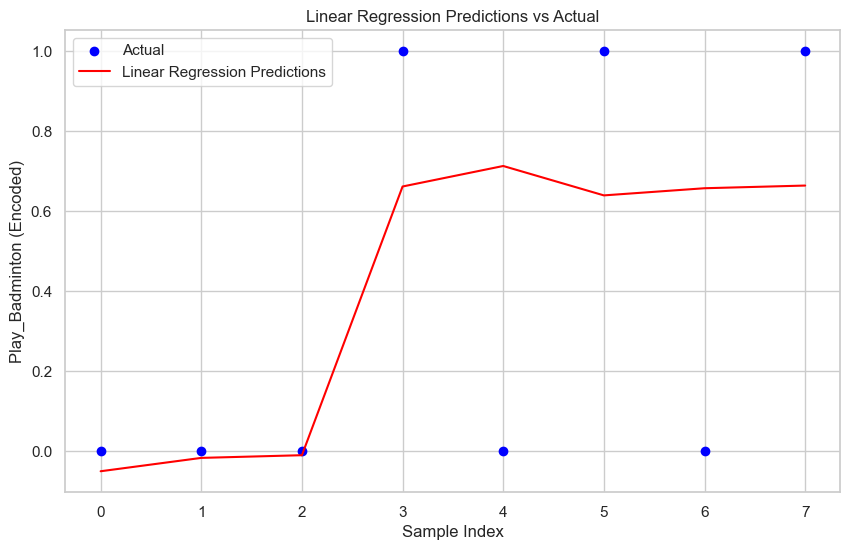

In [34]:
sns.set(style="whitegrid")

# Plot the linear regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_test)), y_pred, color='red', linestyle='-', label='Linear Regression Predictions')
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Play_Badminton (Encoded)')
plt.legend()
plt.show()

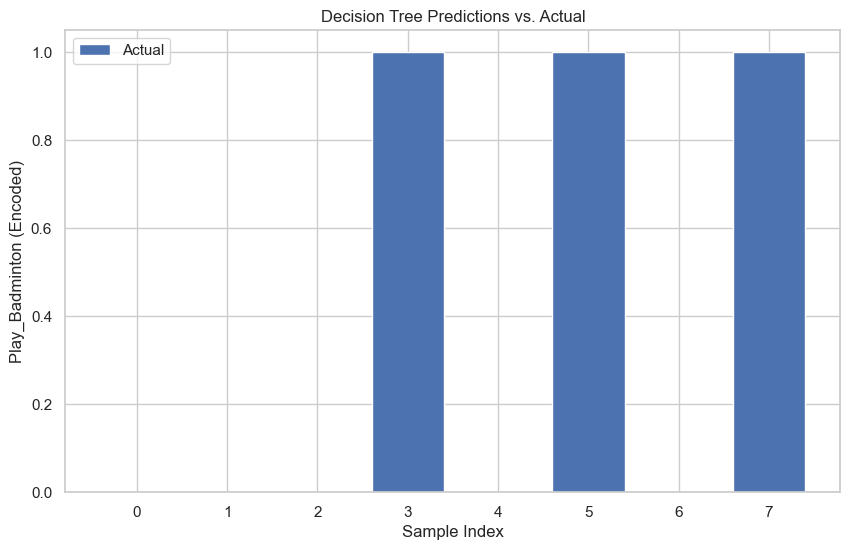

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test, label='Actual')
plt.title('Decision Tree Predictions vs. Actual')
plt.xlabel('Sample Index')
plt.ylabel('Play_Badminton (Encoded)')
plt.legend()
plt.show()


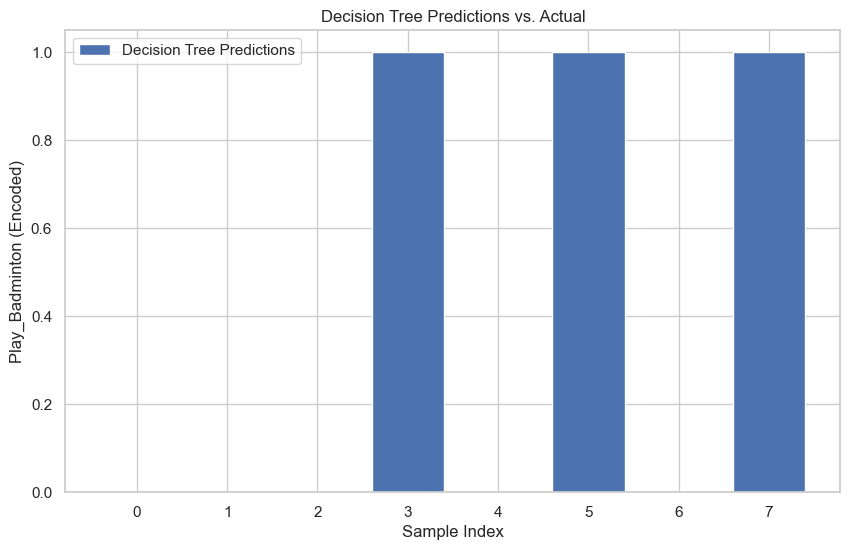

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), ypredTree, label='Decision Tree Predictions')
plt.title('Decision Tree Predictions vs. Actual')
plt.xlabel('Sample Index')
plt.ylabel('Play_Badminton (Encoded)')
plt.legend()
plt.show()


C:\Users\msi1\AppData\Local\Temp\ipykernel_8360\4237564544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns, y=feature_importances, palette='viridis')


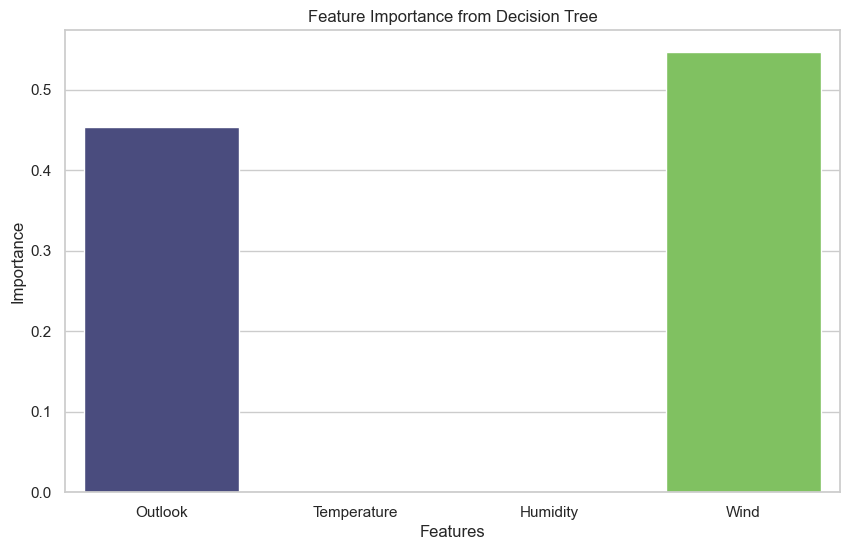

In [37]:
import seaborn as sns

plt.figure(figsize=(10, 6))
feature_importances = decision.feature_importances_
sns.barplot(x=X.columns, y=feature_importances, palette='viridis')
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


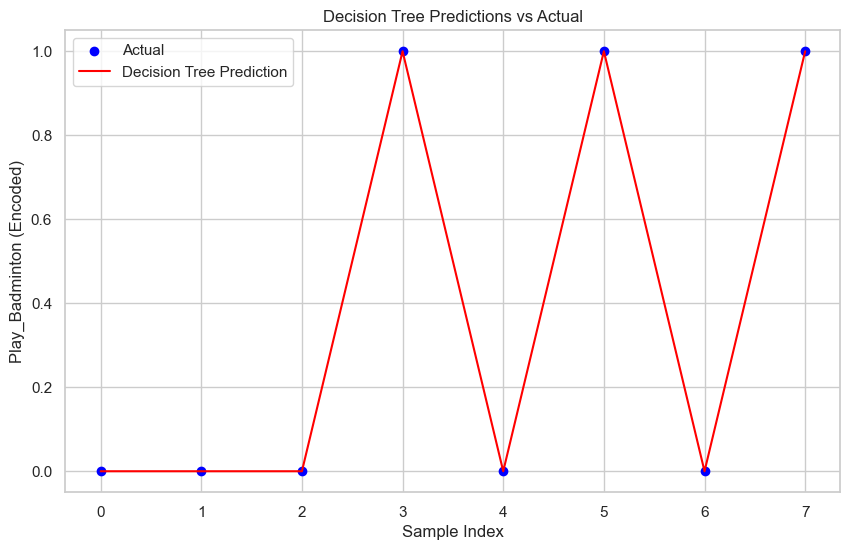

In [38]:
sns.set(style="whitegrid")

# Plot the linear regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_test)), ypredTree, color='red', linestyle='-', label='Decision Tree Prediction')
plt.title('Decision Tree Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Play_Badminton (Encoded)')
plt.legend()
plt.show()

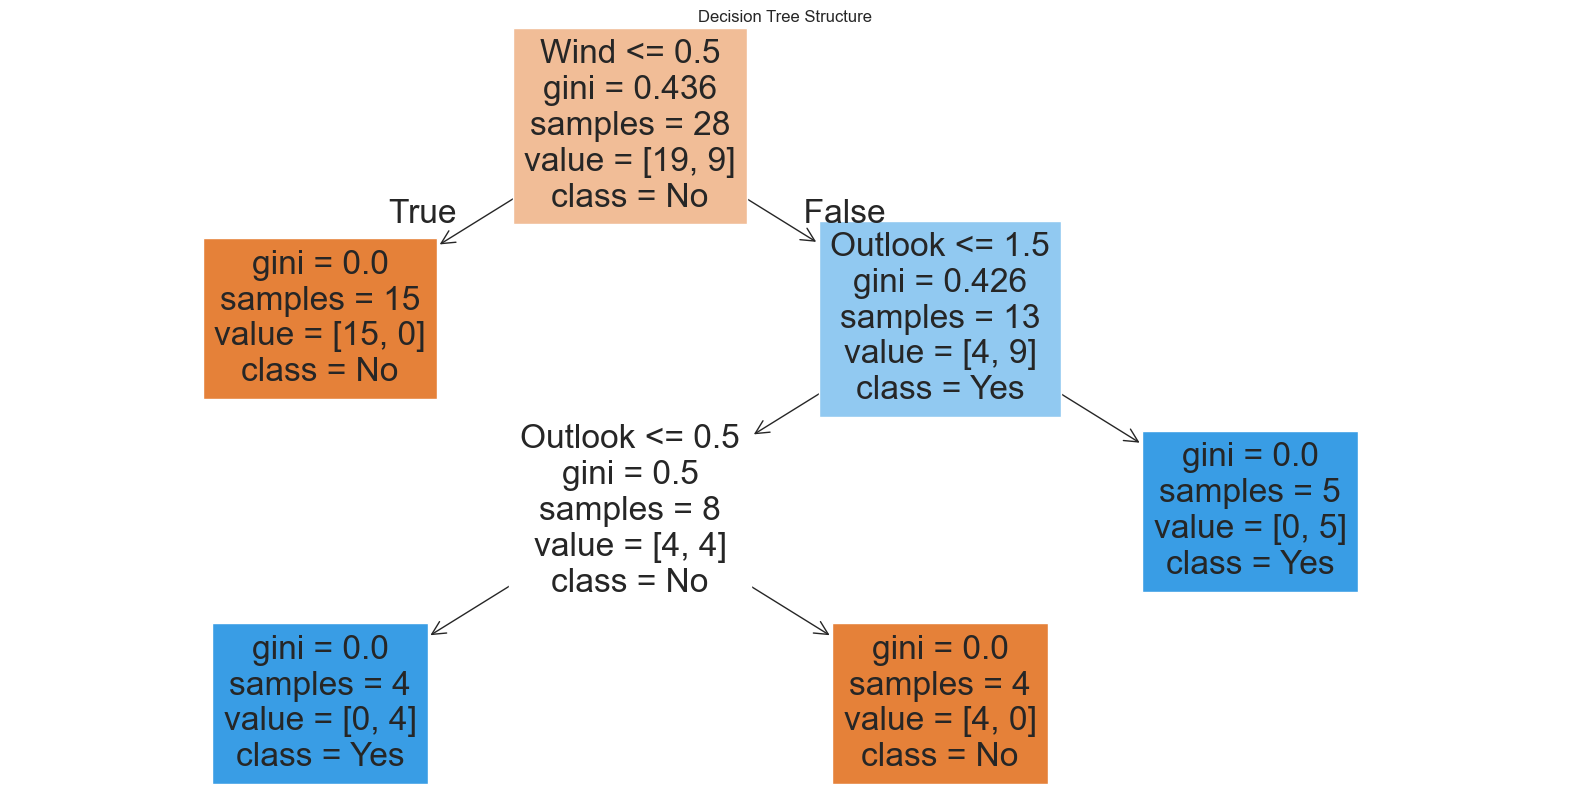

In [40]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(decision, filled=True, feature_names=X.columns, class_names=label_encoders['Play_Badminton'].classes_)
plt.title('Decision Tree Structure')
plt.show()
# gini =  It is a measure of how mixed or impure a dataset is.

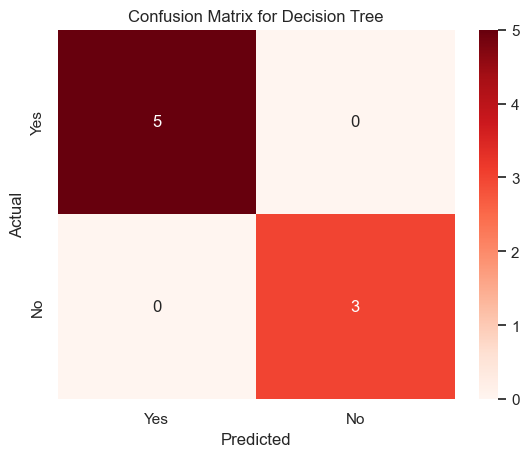

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypredTree)
sns.heatmap(cm, annot=True, cmap='Reds', 
            xticklabels=["Yes", "No"],
            yticklabels=["Yes", "No"])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN Predictions vs Actual

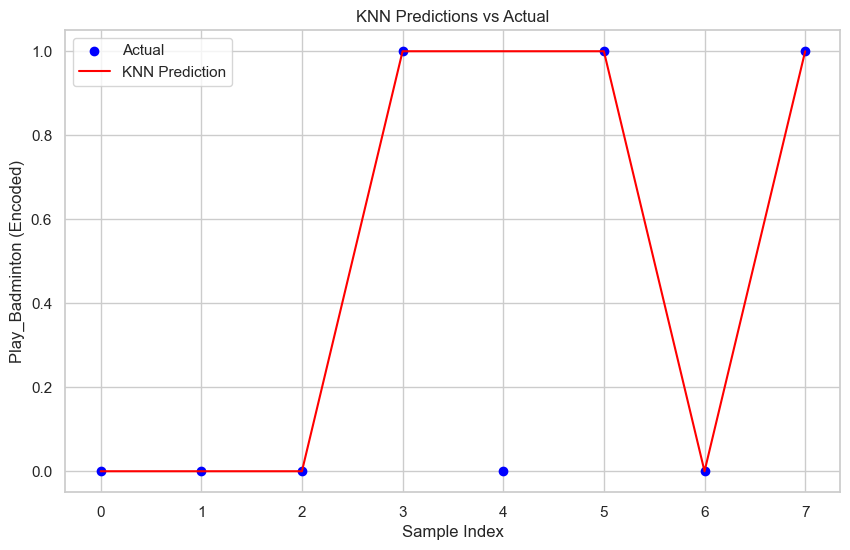

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_test)), ypredKnn, color='red', linestyle='-', label='KNN Prediction')
plt.title('KNN Predictions vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Play_Badminton (Encoded)')
plt.legend()
plt.show()

This plot shows the distribution of each feature across the dataset.

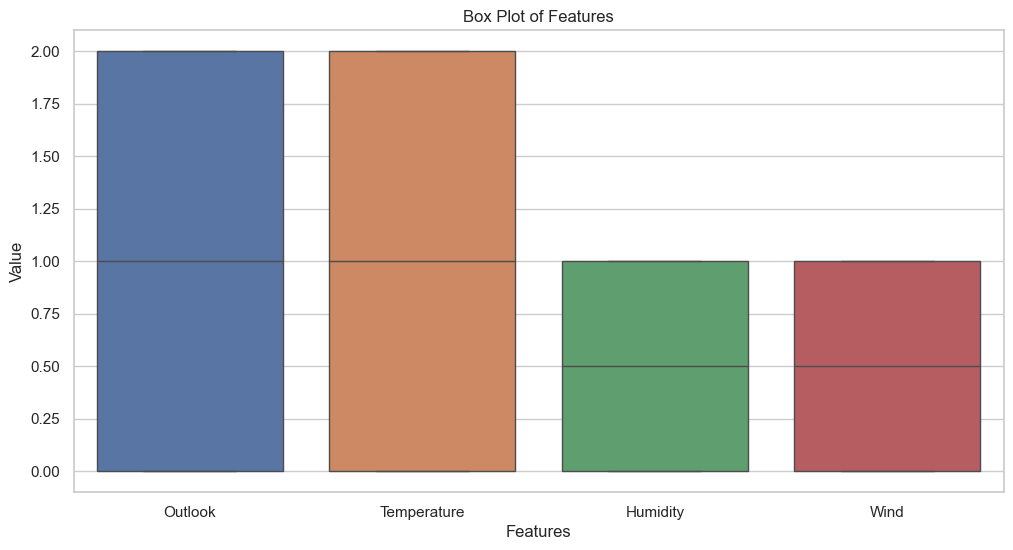

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns='Play_Badminton'))
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()


A heatmap shows the correlation between different features and the target variable.

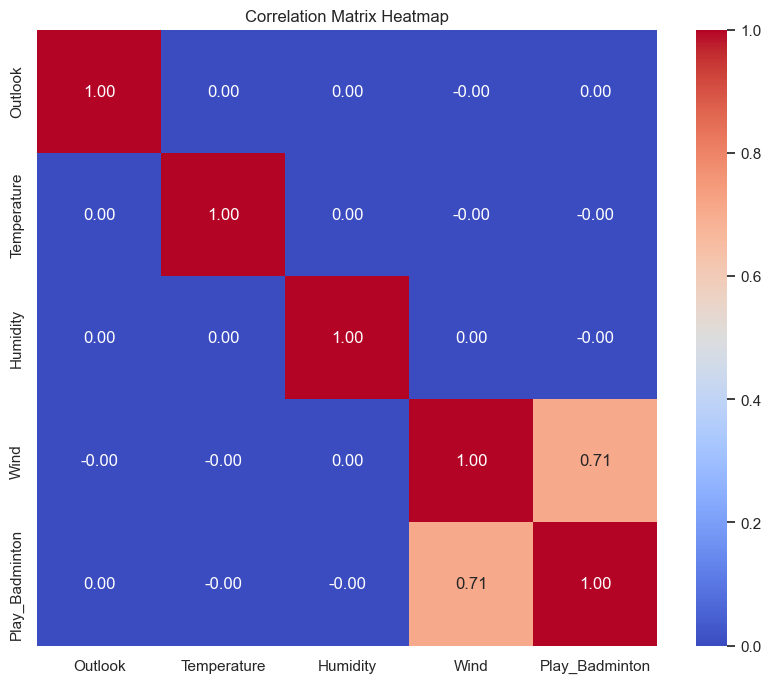

In [28]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [52]:
def prediction(outlook, temperature, humidity, wind):
    # Encode the inputs using the label encoders
    outEncoded = label_encoders['Outlook'].transform([outlook])
    tempEncoded = label_encoders['Temperature'].transform([temperature])
    humiEncoded = label_encoders['Humidity'].transform([humidity])
    windEncoded = label_encoders['Wind'].transform([wind])
    
    # Create a DataFrame for the input
    input_data = pd.DataFrame([[outEncoded[0], tempEncoded[0], humiEncoded[0], windEncoded[0]]], 
                              columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])
    
    # Make predictions using the trained models
    linear_pred = model.predict(input_data)[0]
    tree_pred = decision.predict(input_data)[0]
    knn_pred = knn.predict(input_data)[0]
    
    # Decode the predictions back to the original labels
    tree_pred_label = label_encoders['Play_Badminton'].inverse_transform([tree_pred])[0]
    knn_pred_label = label_encoders['Play_Badminton'].inverse_transform([knn_pred])[0]
    
    return {
        print(f'Linear Regression Prediction: {linear_pred}'),
        print(f'Decision Tree Prediction: {tree_pred_label}'),
        print(f'KNN Prediction: {knn_pred_label}'),
    }

# Get user input
outlook = input("Enter Outlook (Sunny, Overcast, Rain): ")
temperature = input("Enter Temperature (Hot, Mild, Cool): ")
humidity = input("Enter Humidity (High, Normal): ")
wind = input("Enter Wind (Weak, Strong): ")

prediction_result = prediction(outlook, temperature, humidity, wind)


Enter Outlook (Sunny, Overcast, Rain):  Sunny
Enter Temperature (Hot, Mild, Cool):  Hot
Enter Humidity (High, Normal):  Normal
Enter Wind (Weak, Strong):  Strong


Linear Regression Prediction: 0.01923408545239879
Decision Tree Prediction: No
KNN Prediction: No
